In [26]:
import pandas as pd
import numpy as np
import os, sys
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [27]:
# Add the parent directory to the Python path
def get_parent_dir():
    try:
        # Works when running a script
        current_dir = os.path.dirname(__file__)
    except NameError:
        # Works in notebooks / REPL
        current_dir = os.getcwd()
    return os.path.abspath(os.path.join(current_dir, '..'))

parent_dir = get_parent_dir()

# parent_dir = os.path.abspath(os.path.join(os.path.dirname(__file__), '..'))
sys.path.append(parent_dir)

In [28]:
# import my logistic regression class
from ML_toolbox import d_logistic_regression

In [29]:
# training parameters
num_iterations = 50000
my_learning_rate = 1.5
my_delta_J_threshold = 1e-5
bool_augment_X = True

my_bool_regularization = False

if my_bool_regularization:
    my_regularization_lambda = 1.5
else:
    my_regularization_lambda = 0.0

In [30]:
# plotting parameters
fig_width = 8
fig_height = 6

marker_size = 10

plot_training_result = True

save_fig = True

In [31]:
# import data
in_file_name = '../../data/pfas.csv'
data_in_df = pd.read_csv(in_file_name)

#### (a) (10 points) Do natural log transform of the PFOS variable in file $\texttt{pfas.csv}$ and store the results as a new variable log\_PFOS in the data file. Standardize the variables $x$=[log\_PFOS, age, gender, BMI].

In [32]:
# Take the natural log transform of the PFOS variable
data_in_df['log_PFOS'] = np.log(data_in_df['PFOS'])

# get X and y
y = data_in_df[['disease']]
X = data_in_df.copy().drop(columns=['disease', 'PFOS'])


The 0 th training and testing

Optimization terminated successfully.
         Current function value: 0.651756
         Iterations 5
my parameters: [0.14146714 0.24481188 0.30649993 0.39260869 0.09219859]
sklearn parameters: [[0.14096162 0.24461961 0.30482321 0.38965267 0.0933144 ]]
statsmoedl parameters: const    0.143532
x1       0.249309
x2       0.309898
x3       0.396120
x4       0.095627
dtype: float64
My accuracy: 0.5666666666666667
sklearn accuracy: 0.5666666666666667
statsmodel accuracy: 0.5666666666666667

The 1 th training and testing

Optimization terminated successfully.
         Current function value: 0.663726
         Iterations 4
my parameters: [ 0.16866317  0.22595744  0.22597814  0.3283609  -0.00086894]
sklearn parameters: [[1.68682589e-01 2.27014916e-01 2.25782064e-01 3.27087821e-01
  2.78842247e-04]]
statsmoedl parameters: const    0.171580
x1       0.231198
x2       0.229498
x3       0.332348
x4       0.000564
dtype: float64
My accuracy: 0.6666666666666666
sklear

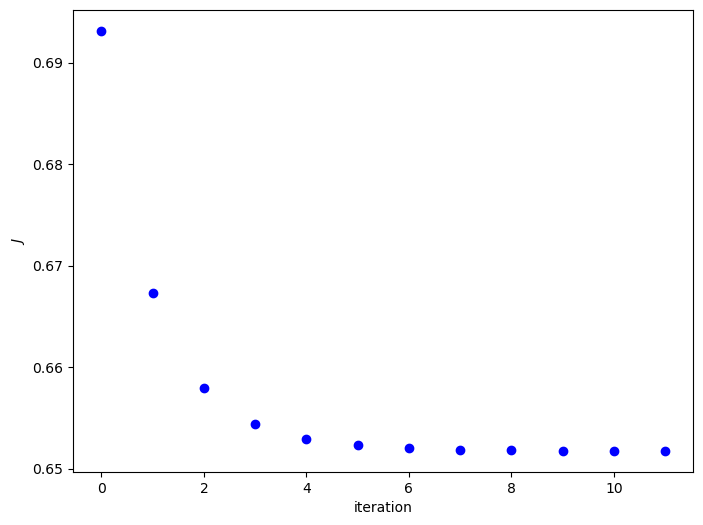

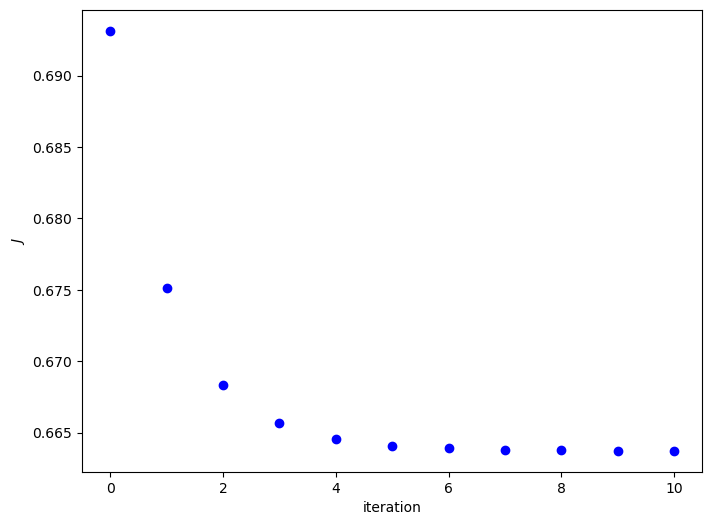

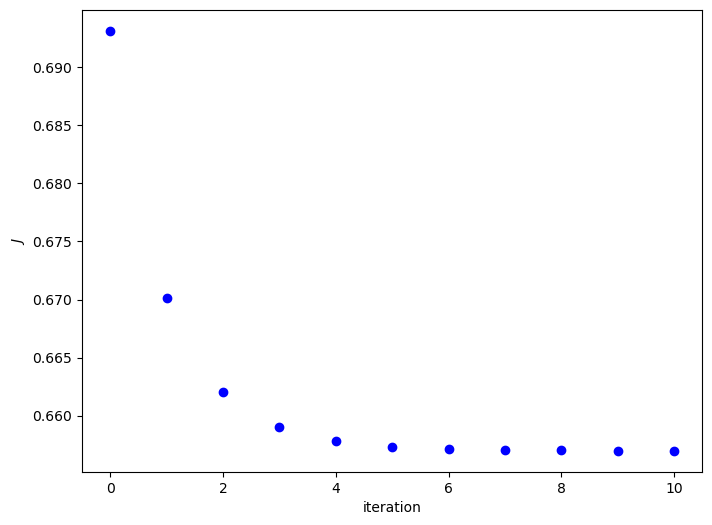

In [33]:
num_of_times_to_train_and_test = 3
for i in range(num_of_times_to_train_and_test):
    print()
    print(f'The {i} th training and testing')
    print()

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.1)

    # standardize the training data
    standard_scaler = StandardScaler()
    X_train_scaled = standard_scaler.fit_transform(X_train)
    X_test_scaled = standard_scaler.transform(X_test)

    if bool_augment_X:
        X_train_scaled = sm.add_constant(X_train_scaled)
        X_test_scaled = sm.add_constant(X_test_scaled)

    y_train_array = y_train.to_numpy()

    my_num_of_variables = X_train_scaled.shape[1]
    my_initial_theta = np.zeros((my_num_of_variables, 1))

    my_logistic_obj = d_logistic_regression.logistic_regression(X=X_train_scaled,
                                                                        y=y_train_array,
                                                                        delta_J_threshold=my_delta_J_threshold,
                                                                        initial_theta=my_initial_theta,
                                                                        learning_rate=my_learning_rate,
                                                                        bool_regularization=my_bool_regularization,
                                                                        regularization_lambda=my_regularization_lambda)

    optimal_theta, J = my_logistic_obj.fit()

    # prediction
    my_label_predict, my_prob_predict = my_logistic_obj.predict(X_test_scaled)

    # plot J and theta from training
    if my_bool_regularization:
        fig = plt.figure(figsize=(fig_width, fig_height))
        ax = fig.add_subplot(1, 1, 1)
        ax.scatter(range(len(J)), J, color='blue')
        ax.set_xlabel("iteration")
        ax.set_ylabel(r'$J$')
        fig_title = r'$\lambda$=' + str(my_regularization_lambda)
        ax.set_title(fig_title)
        fig.show()

        if save_fig:
            figure_file_name = "cost_vs_iteration.pdf"
            fig.savefig(figure_file_name)

    else:
        fig = plt.figure(figsize=(fig_width, fig_height))
        ax = fig.add_subplot(1, 1, 1)
        ax.scatter(range(len(J)), J, color='blue')
        ax.set_xlabel("iteration")
        ax.set_ylabel(r'$J$')

    # =====================
    # compare with sklearn
    # =====================
    sklearn_logistic_obj = LogisticRegression(random_state=0,
                                             solver='liblinear',
                                             fit_intercept=False,
                                             tol=1e-6)
    sklearn_logistic_obj.fit(X_train_scaled, y_train_array.ravel())

    # testing
    sklearn_label_predict= sklearn_logistic_obj.predict(X_test_scaled)
    sklearn_prob_predict = sklearn_logistic_obj.predict_proba(X_test_scaled)

    # =====================
    # compare with statsmodel
    # =====================
    statsmodel_logistic_obj = sm.Logit(y_train, X_train_scaled)
    statsmodel_fit_results = statsmodel_logistic_obj.fit()

    statsmodel_prob_predict = statsmodel_fit_results.predict(X_test_scaled)
    statsmodel_label_predict = (statsmodel_fit_results.predict(X_test_scaled) > 0.5).astype(int)

    # =====================
    # compare learned parameters
    # =====================
    print('my parameters:', optimal_theta.ravel())
    print('sklearn parameters:', sklearn_logistic_obj.coef_)
    print('statsmoedl parameters:', statsmodel_fit_results.params)


    # =====================
    # compare the accuracy score
    # =====================
    my_accuracy_score = accuracy_score(my_label_predict, y_test)
    sklearn_accuracy_score = accuracy_score(sklearn_label_predict, y_test)
    statsmodel_accuracy_score = accuracy_score(statsmodel_label_predict, y_test)

    print("My accuracy:", my_accuracy_score)
    print("sklearn accuracy:", sklearn_accuracy_score)
    print("statsmodel accuracy:", statsmodel_accuracy_score)
